## Train

In [2]:
import subprocess
c = 10
for i in range(1,c+1):
    !python clean.py
    !python data/split_train_and_test.py
    !python data/create_empty_db.py
    !python data/insert_values_to_db.py
    !python data/insert_standard_to_db.py
    !python data/data_to_npz.py
    subprocess.call("python train.py " + str(i))
    print("OK!",i)

OK! 1
OK! 2
OK! 3
OK! 4
OK! 5
OK! 6
OK! 7
OK! 8
OK! 9
OK! 10


In [25]:
!python word2vec/transform_split.py

['1078838064707825665', '1069529183540338688', '1069529151650942977', '1063418818830131200', '1063075230149574656', '1062725984024023041', '1058564392428593153', '1053429629359276033', '1053429548740538370', '1051998935630241792', '1051288278765264896', '1050976415443648512', '1048759497861165056', '1047780576218865664', '1047780520606584833', '1047090923123834881', '1046746960483348480', '1043769971489136641', '1043052220210499584', '1043052039494725632', '1043051866949447680', '1043051761693470722', '1040078397085384705', '1039330708295053312', '1039328560903643137', '1039328312986808320', '1039004992957345793', '1038731716523741185', '1038301801533960193', '1038037816519811072', '1038024530189377537', '1038024327088590849', '1037939331669716992', '1037656784675061760', '1037656614608691200', '1037656168200429568', '1037131496237060096', '1037131455434973184', '1037131313495470080', '1036865242318295040', '1036865189553950720', '1036550532221947904', '1035759888037642241', '103575985

In [10]:
subprocess.call("python train.py " + "11")

0

## Analyze

In [4]:
import csv
def get_parties():
    parties = []
    with open("DataCollecting/Politicians.csv","r") as f:
        data = csv.DictReader(f)
        for row in data:
            parties.append(row["party_name"])
    return parties

Average Accuracy: 0.7963198151821608


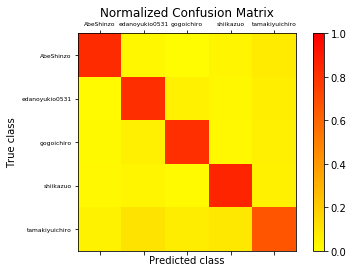

In [27]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt


politicians = get_parties()

i = 10

accuracies = []
with open("result/accuracy.txt","r") as f:
    for l in f.readlines():
        accuracies.append(float(l))
print("Average Accuracy:",np.mean(accuracies))
        

cm = []
for i in range(1, i+1):
    cm.append(np.load("result/cm{0}.npy".format(i)))
cm = np.asarray(cm)
cm_a = np.mean(cm,axis=0)

fig = plt.figure()
ax = plt.subplot()
cax = ax.matshow(cm_a, interpolation="nearest", cmap="autumn_r",vmin=0,vmax=1)
fig.colorbar(cax)
ax.set_xticklabels([""]+politicians,fontsize=6)
ax.set_yticklabels([""]+politicians,fontsize=6)
plt.title("Normalized Confusion Matrix")
plt.xlabel("Predicted class")
plt.ylabel("True class")
plt.show()

with open("result/cm.csv","w") as f:
    writer = csv.writer(f,delimiter=",")
    writer.writerows(cm_a)